In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/heart-stroke-data/stroke-data-discretized.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,4,0,1,Yes,Private,Urban,4,1,formerly smoked,1
1,Female,3,0,0,Yes,Self-employed,Rural,3,1,never smoked,1
2,Male,4,0,1,Yes,Private,Rural,1,1,never smoked,1
3,Female,2,0,0,Yes,Private,Urban,2,1,smokes,1
4,Female,4,1,0,Yes,Self-employed,Rural,2,0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,4,1,0,Yes,Private,Urban,0,1,never smoked,0
5106,Female,4,0,0,Yes,Self-employed,Urban,1,1,never smoked,0
5107,Female,2,0,0,Yes,Self-employed,Rural,0,1,never smoked,0
5108,Male,3,0,0,Yes,Private,Rural,2,0,formerly smoked,0


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/heart-stroke-data/stroke-data-discretized-train.csv')
train_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,4,0,1,Yes,Private,Urban,4,1,formerly smoked,1
1,Female,3,0,0,Yes,Self-employed,Rural,3,1,never smoked,1
2,Male,4,0,1,Yes,Private,Rural,1,1,never smoked,1
3,Female,2,0,0,Yes,Private,Urban,2,1,smokes,1
4,Female,4,1,0,Yes,Self-employed,Rural,2,0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4146,Female,0,0,0,No,children,Rural,1,0,Unknown,0
4147,Female,4,1,0,Yes,Private,Urban,0,1,never smoked,0
4148,Female,4,0,0,Yes,Self-employed,Urban,1,1,never smoked,0
4149,Female,2,0,0,Yes,Self-employed,Rural,0,1,never smoked,0


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/heart-stroke-data/stroke-data-discretized-test.csv')
test_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,4,0,0,No,Private,Urban,0,0,never smoked,1
1,Female,3,0,0,Yes,Private,Rural,0,1,Unknown,1
2,Female,4,0,0,Yes,Self-employed,Urban,4,0,never smoked,1
3,Male,4,0,1,Yes,Self-employed,Urban,3,1,smokes,1
4,Female,4,1,1,No,Private,Rural,0,0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
954,Female,0,0,0,No,children,Rural,0,0,Unknown,0
955,Male,1,0,0,No,Govt_job,Rural,1,0,smokes,0
956,Male,0,0,0,No,children,Urban,0,0,Unknown,0
957,Male,0,0,0,No,children,Urban,0,0,Unknown,0


In [ ]:
train_df['gender'] = train_df['gender'].map({'Female':0, 'Male':1, 'Other':2})
train_df['ever_married'] = train_df['ever_married'].map({'Yes':0, 'No':1})
train_df['work_type'] = train_df['work_type'].map({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4})
train_df['Residence_type'] = train_df['Residence_type'].map({'Urban':0, 'Rural':1})
train_df['smoking_status'] = train_df['smoking_status'].map({'never smoked':0, 'Unknown':1, 'formerly smoked':2, 'smokes':3})

test_df['gender'] = test_df['gender'].map({'Female':0, 'Male':1, 'Other':2})
test_df['ever_married'] = test_df['ever_married'].map({'Yes':0, 'No':1})
test_df['work_type'] = test_df['work_type'].map({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4})
test_df['Residence_type'] = test_df['Residence_type'].map({'Urban':0, 'Rural':1})
test_df['smoking_status'] = test_df['smoking_status'].map({'never smoked':0, 'Unknown':1, 'formerly smoked':2, 'smokes':3})

In [ ]:
X_train, y_train, X_test, y_test = train_df.drop(['stroke'], axis=1), train_df['stroke'], test_df.drop(['stroke'], axis=1), test_df['stroke']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4151, 10), (4151,), (959, 10), (959,))

In [ ]:
model1 = MultinomialNB()
model1.fit(X_train, y_train)

preds = model1.predict(X_test)
acc1, pre1, rec1, f1s1, roc1, con1, cls1 = accuracy_score(y_test, preds), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds), roc_auc_score(y_test, preds), confusion_matrix(y_test, preds), classification_report(y_test, preds)
print('Multinomial Naive Bayes Model trained on the descritized Stroke Data:')
print('Accuracy: ', acc1)
print('Precision: ', pre1)
print('Recall: ', rec1)
print('F1-Score: ', f1s1)
print('ROC AUC Score: ', roc1)
print('Confusion Matrix:\n', con1)
print('Classification Report:\n', cls1)

Multinomial Naive Bayes Model trained on the descritized Stroke Data:
Accuracy:  0.9562043795620438
Precision:  0.25
Recall:  0.025
F1-Score:  0.045454545454545456
ROC AUC Score:  0.5108677910772579
Confusion Matrix:
 [[916   3]
 [ 39   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       919
           1       0.25      0.03      0.05        40

    accuracy                           0.96       959
   macro avg       0.60      0.51      0.51       959
weighted avg       0.93      0.96      0.94       959



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/heart-stroke-data/stroke-data-original.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.781891,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,34.624694,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/heart-stroke-data/stroke-data-original-train.csv')
train_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.781891,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4146,Female,13.0,0,0,No,children,Rural,103.08,18.600000,Unknown,0
4147,Female,80.0,1,0,Yes,Private,Urban,83.75,34.624694,never smoked,0
4148,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
4149,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Datasets/heart-stroke-data/stroke-data-original-test.csv')
test_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,69.00,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
1,Female,59.00,0,0,Yes,Private,Rural,76.15,28.263968,Unknown,1
2,Female,79.00,0,0,Yes,Self-employed,Urban,228.70,26.600000,never smoked,1
3,Male,69.00,0,1,Yes,Self-employed,Urban,195.23,28.300000,smokes,1
4,Female,82.00,1,1,No,Private,Rural,84.03,26.500000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
954,Female,0.72,0,0,No,children,Rural,62.13,16.800000,Unknown,0
955,Male,26.00,0,0,No,Govt_job,Rural,100.85,21.000000,smokes,0
956,Male,13.00,0,0,No,children,Urban,82.38,24.300000,Unknown,0
957,Male,9.00,0,0,No,children,Urban,71.88,17.500000,Unknown,0


In [ ]:
train_df['gender'] = train_df['gender'].map({'Female':0, 'Male':1, 'Other':2})
train_df['ever_married'] = train_df['ever_married'].map({'Yes':0, 'No':1})
train_df['work_type'] = train_df['work_type'].map({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4})
train_df['Residence_type'] = train_df['Residence_type'].map({'Urban':0, 'Rural':1})
train_df['smoking_status'] = train_df['smoking_status'].map({'never smoked':0, 'Unknown':1, 'formerly smoked':2, 'smokes':3})

test_df['gender'] = test_df['gender'].map({'Female':0, 'Male':1, 'Other':2})
test_df['ever_married'] = test_df['ever_married'].map({'Yes':0, 'No':1})
test_df['work_type'] = test_df['work_type'].map({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4})
test_df['Residence_type'] = test_df['Residence_type'].map({'Urban':0, 'Rural':1})
test_df['smoking_status'] = test_df['smoking_status'].map({'never smoked':0, 'Unknown':1, 'formerly smoked':2, 'smokes':3})

In [ ]:
X_train, y_train, X_test, y_test = train_df.drop(['stroke'], axis=1), train_df['stroke'], test_df.drop(['stroke'], axis=1), test_df['stroke']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4151, 10), (4151,), (959, 10), (959,))

In [ ]:
model2 = GaussianNB()
model2.fit(X_train, y_train)

preds = model2.predict(X_test)
acc2, pre2, rec2, f1s2, roc2, con2, cls2 = accuracy_score(y_test, preds), precision_score(y_test, preds), recall_score(y_test, preds), f1_score(y_test, preds), roc_auc_score(y_test, preds), confusion_matrix(y_test, preds), classification_report(y_test, preds)
print('Gaussian Naive Bayes Model trained on the continuous Heart Data:')
print('Accuracy: ', acc2)
print('Precision: ', pre2)
print('Recall: ', rec2)
print('F1-Score: ', f1s2)
print('ROC AUC Score: ', roc2)
print('Confusion Matrix:\n', con2)
print('Classification Report:\n', cls2)

Gaussian Naive Bayes Model trained on the continuous Heart Data:
Accuracy:  0.8748696558915537
Precision:  0.14912280701754385
Recall:  0.425
F1-Score:  0.22077922077922077
ROC AUC Score:  0.6597252448313384
Confusion Matrix:
 [[822  97]
 [ 23  17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       919
           1       0.15      0.42      0.22        40

    accuracy                           0.87       959
   macro avg       0.56      0.66      0.58       959
weighted avg       0.94      0.87      0.90       959



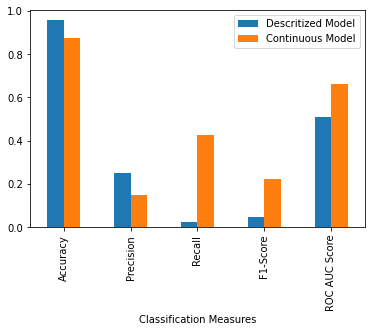

In [ ]:
res = pd.DataFrame({
    'Classification Measures': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score'],
    'Descritized Model': [acc1, pre1, rec1, f1s1, roc1],
    'Continuous Model': [acc2, pre2, rec2, f1s2, roc2]
})

res.plot(x='Classification Measures', y=['Descritized Model', 'Continuous Model'], kind='bar')